In [1]:
import tensorflow as tf
import keras 
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#!unzip "/content/drive/MyDrive/Brain Tumor Project/Brain tumor.zip" -d "/content/drive/MyDrive/Brain Tumor Project/"

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_root = "/content/drive/MyDrive/tmt"

from keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(224, 224),batch_size=1952)

Found 2000 images belonging to 2 classes.


In [4]:
batches.class_indices

{'Bacterial_Spot': 0, 'Healthy': 1}

In [5]:
imgs, labels = next(batches)


In [6]:
print(imgs.shape)
print(labels.shape)

(1952, 224, 224, 3)
(1952, 2)


In [7]:
from sklearn.model_selection import train_test_split
# Train, validation and test split

X_train, X_test, y_train, y_test = train_test_split(imgs, labels, test_size=0.15, random_state=7)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

In [8]:
print("*-*-*-*-*-*")
print("Train")
print(X_train.shape)
print(y_train.shape)


print("*-*-*-*-*-*")
print("Validation")
print(X_val.shape)
print(y_val.shape)

print("*-*-*-*-*-*")
print("Test")
print(X_test.shape)
print(y_test.shape)

*-*-*-*-*-*
Train
(1410, 224, 224, 3)
(1410, 2)
*-*-*-*-*-*
Validation
(249, 224, 224, 3)
(249, 2)
*-*-*-*-*-*
Test
(293, 224, 224, 3)
(293, 2)


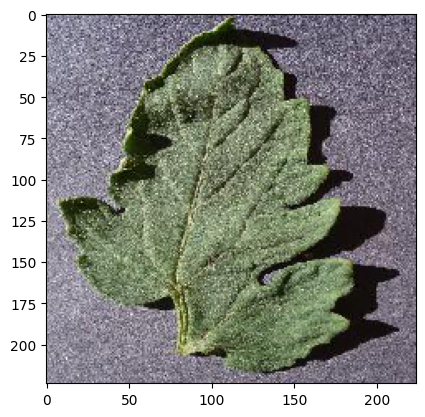

In [9]:
import matplotlib.pyplot as plt
img = X_train[3]
plt.imshow(img.astype(np.uint8),cmap=plt.cm.binary)
plt.show()

In [10]:
import keras
#from keras.models import Input
from keras.layers import Input
from tensorflow.python.keras.models import Input
from tensorflow.keras.utils import get_source_inputs
#from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization


In [11]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [12]:
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])

In [13]:
history = model.fit(X_train,y_train,
                    validation_data = (X_val, y_val) ,
                    batch_size = 32, 
                    epochs = 50)

Epoch 1/50
45/45 [==============================] - 16s 80ms/step - loss: 2.6168 - accuracy: 0.5901 - val_loss: 3.2010 - val_accuracy: 0.4859
Epoch 2/50
45/45 [==============================] - 3s 62ms/step - loss: 0.8606 - accuracy: 0.6000 - val_loss: 0.6906 - val_accuracy: 0.4859
Epoch 3/50
45/45 [==============================] - 2s 54ms/step - loss: 0.6895 - accuracy: 0.6773 - val_loss: 0.7201 - val_accuracy: 0.6988
Epoch 4/50
45/45 [==============================] - 2s 53ms/step - loss: 0.7336 - accuracy: 0.7170 - val_loss: 0.4587 - val_accuracy: 0.7510
Epoch 5/50
45/45 [==============================] - 2s 55ms/step - loss: 0.4539 - accuracy: 0.8355 - val_loss: 0.5948 - val_accuracy: 0.7149
Epoch 6/50
45/45 [==============================] - 2s 53ms/step - loss: 0.3596 - accuracy: 0.8858 - val_loss: 0.0911 - val_accuracy: 0.9679
Epoch 7/50
45/45 [==============================] - 3s 60ms/step - loss: 0.5090 - accuracy: 0.9291 - val_loss: 0.0735 - val_accuracy: 0.9799
Epoch 8/50
4

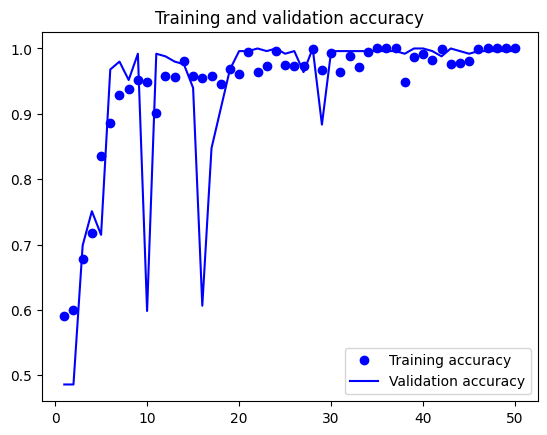

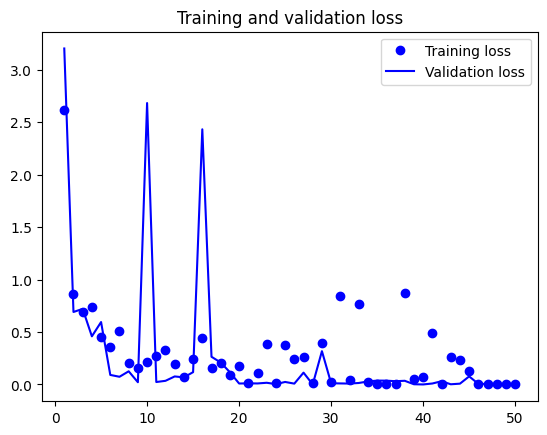

In [14]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

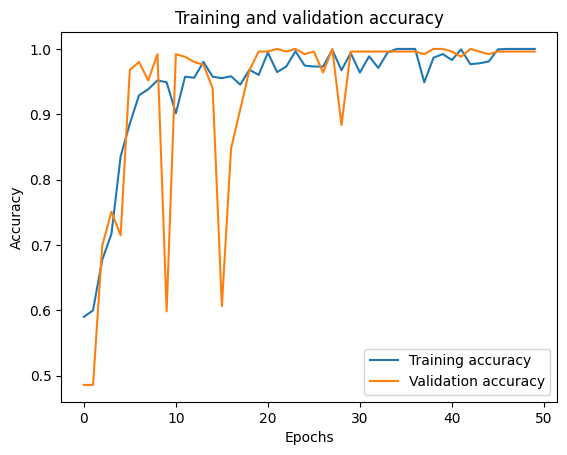

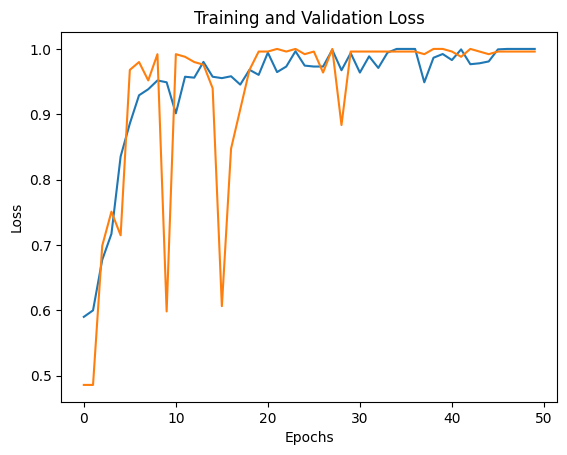

In [15]:
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Plot using Seaborn

plt.plot(history.history['accuracy'], label="Training loss")
plt.plot(history.history['val_accuracy'], label="Validation loss")
#my_plot = sns.lineplot(data=history[["loss","validation_loss"]])
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.legend(labels=["Training", "Validation"])
plt.title('Training and Validation Loss')
plt.show()

In [16]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 42ms/step - loss: 0.0265 - accuracy: 0.9966


[0.026536516845226288, 0.9965870380401611]

In [ ]:
model.save('leaf.h5')

In [17]:
import numpy as np
import pandas as pd


In [18]:
y_pred = model.predict(X_test, verbose=0)


In [19]:
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

In [20]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

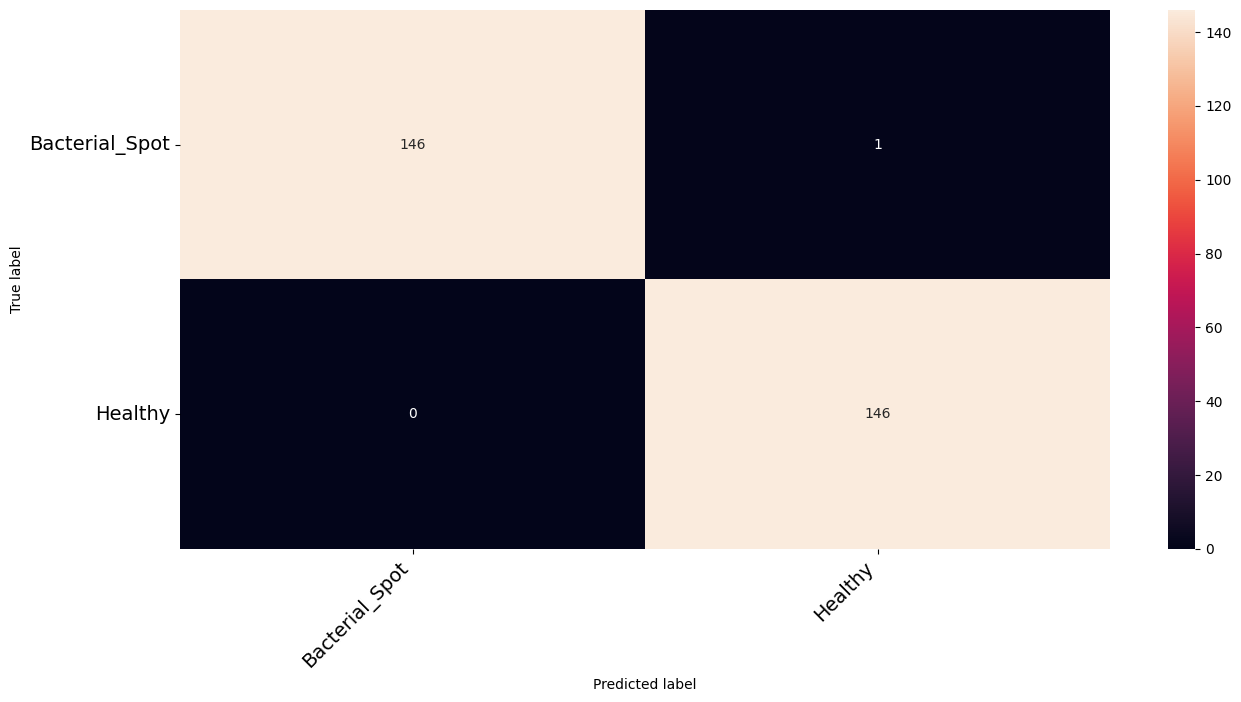

In [21]:
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (15,7), fontsize=14)

In [22]:
# From categorical outputs to discrete values

y_pred_ = [np.argmax(y) for y in y_pred]
y_test_ = [np.argmax(y) for y in y_test]

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test_, y_pred_))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       147
           1       0.99      1.00      1.00       146

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



In [24]:
categories = {"Bacterial_spot": 0,
              "Yellow_Leaf_Curl_Virus": 1,
               "healthy_leaf": 2,
               "mosaic_virus": 3}
print(categories)

{'Bacterial_spot': 0, 'Yellow_Leaf_Curl_Virus': 1, 'healthy_leaf': 2, 'mosaic_virus': 3}


In [25]:
def predict_class(img):
    # Resize
    img = img.reshape(1,224,224,3)
    # Predict
    predictions = model.predict(img)
    true_prediction = [tf.argmax(pred) for pred in predictions]
    true_prediction = np.array(true_prediction)
    
    # Return label corresponding to predicted index
    return list(categories.keys())[list(categories.values()).index(true_prediction)]
    

In [26]:
predict_class(X_test[0])

1/1 [==============================] - 0s 230ms/step


'Bacterial_spot'

1/1 [==============================] - 0s 17ms/step


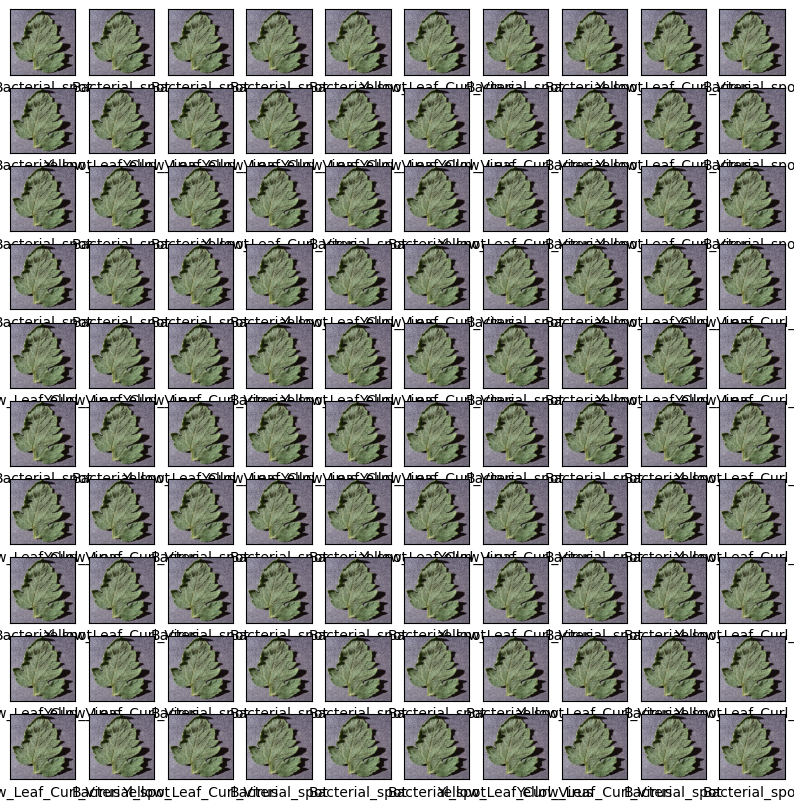

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
random_inds = np.random.choice(X_test.shape[0],100)
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image_ind = random_inds[i]
    #plt.imshow(np.squeeze(X_test[image_ind]), cmap=plt.cm.binary)
    plt.imshow(np.squeeze(img.astype(np.uint8)), cmap=plt.cm.binary)

    # Predict and get label
    label = predict_class(X_test[image_ind])
    plt.xlabel(label)